Base Accuracy: 0.86

Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Tuned Accuracy: 0.86

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.86      0.86        72
           1       0.87      0.86      0.86        78

    accuracy                           0.86       150
   macro avg       0.86      0.86      0.86       150
weighted avg       0.86      0.86      0.86       150



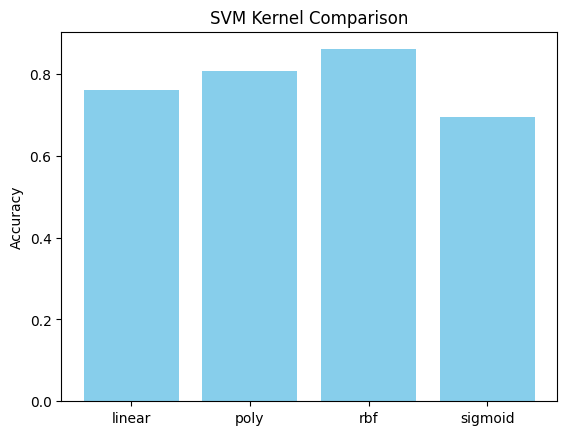

In [1]:
# ------------------------------------------------------------
# LAB: Support Vector Machine (SVM) for Binary Classification
# ------------------------------------------------------------

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt

# Step 1: Generate high-dimensional synthetic data
X, y = make_classification(
    n_samples=500, n_features=15, n_informative=8,
    n_redundant=3, n_classes=2, random_state=42
)

# Step 2: Split and scale data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Step 3: Train base SVM model
svm = SVC(kernel='rbf', random_state=42)
svm.fit(X_train, y_train)
print("Base Accuracy:", accuracy_score(y_test, svm.predict(X_test)))

# Step 4: Hyperparameter tuning
params = {'C': [0.1, 1, 10], 'gamma': ['scale', 0.01, 0.001], 'kernel': ['linear', 'rbf', 'poly']}
grid = GridSearchCV(SVC(), params, cv=5)
grid.fit(X_train, y_train)

best = grid.best_estimator_
print("\nBest Parameters:", grid.best_params_)
print("Tuned Accuracy:", accuracy_score(y_test, best.predict(X_test)))
print("\nClassification Report:\n", classification_report(y_test, best.predict(X_test)))

# Step 5: Compare kernels
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
acc = []
for k in kernels:
    model = SVC(kernel=k).fit(X_train, y_train)
    acc.append(accuracy_score(y_test, model.predict(X_test)))

plt.bar(kernels, acc, color='skyblue')
plt.title("SVM Kernel Comparison")
plt.ylabel("Accuracy")
plt.show()
